In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
ag = pd.read_excel(r"C:\Users\hp\OneDrive\Documents\MODEL-AGRI-SDC.xlsx")


# Exploratory Data Analysis (EDA)


In [3]:
ag.head(10)

,Column1,Area,Item,Year,Yield / Hectre (hg),Avg Rainfall / Year (mm ),Pesticides (Tonnes),Avg Temp,Yield (Tonnes / Hectre),Pesticide (Per Ton of Yield),Region-Crop Frequency,Rainfall-Pesticide Ratio (mm/Ton)
0,0,Albania,Maize,1990,36613,1485,121.0,16.37,3.6613,33.048371,23,12.272717
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,6.6667,18.149909,23,12.272717
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37,2.3333,51.857884,4,12.272717
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,1.2500,96.800000,3,12.272717
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0.7000,172.857143,23,12.272717
5,5,Albania,Wheat,1990,30197,1485,121.0,16.37,3.0197,40.070206,23,12.272717
6,6,Albania,Maize,1991,29068,1485,121.0,15.36,2.9068,41.626531,23,12.272717
7,7,Albania,Potatoes,1991,77818,1485,121.0,15.36,7.7818,15.549102,23,12.272717
8,8,Albania,"Rice, paddy",1991,28538,1485,121.0,15.36,2.8538,42.399608,4,12.272717
9,9,Albania,Sorghum,1991,6667,1485,121.0,15.36,0.6667,181.490925,3,12.272717


In [4]:
ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Column1                            28242 non-null  int64  
 1   Area                               28242 non-null  object 
 2   Item                               28242 non-null  object 
 3   Year                               28242 non-null  int64  
 4   Yield / Hectre (hg)                28242 non-null  int64  
 5   Avg Rainfall / Year (mm )          28242 non-null  int64  
 6   Pesticides (Tonnes)                28242 non-null  float64
 7   Avg Temp                           28242 non-null  float64
 8   Yield (Tonnes / Hectre)            28242 non-null  float64
 9   Pesticide (Per Ton of Yield)       28242 non-null  float64
 10  Region-Crop Frequency              28242 non-null  int64  
 11  Rainfall-Pesticide Ratio (mm/Ton)  28242 non-null  flo

In [5]:
ag.describe()

,Column1,Year,Yield / Hectre (hg),Avg Rainfall / Year (mm ),Pesticides (Tonnes),Avg Temp,Yield (Tonnes / Hectre),Pesticide (Per Ton of Yield),Region-Crop Frequency,Rainfall-Pesticide Ratio (mm/Ton)
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627,7.705333,10999.909441,151.156221,36.136235
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051,8.495661,20423.062662,162.594707,923.966147
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000,0.005000,0.005846,1.000000,0.003437
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500,1.991925,427.880976,23.000000,0.018431
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000,3.829500,2699.355346,69.000000,0.035436
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000,10.467675,12415.488649,207.000000,0.572163
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000,50.141200,456000.000000,506.000000,33466.334165


In [6]:
ag.isnull().sum()

Column1                              0
Area                                 0
Item                                 0
Year                                 0
Yield / Hectre (hg)                  0
Avg Rainfall / Year (mm )            0
Pesticides (Tonnes)                  0
Avg Temp                             0
Yield (Tonnes / Hectre)              0
Pesticide (Per Ton of Yield)         0
Region-Crop Frequency                0
Rainfall-Pesticide Ratio (mm/Ton)    0
dtype: int64

In [8]:
ag = ag.drop(columns = ['Column1'])
ag.head()

,Area,Item,Year,Yield / Hectre (hg),Avg Rainfall / Year (mm ),Pesticides (Tonnes),Avg Temp,Yield (Tonnes / Hectre),Pesticide (Per Ton of Yield),Region-Crop Frequency,Rainfall-Pesticide Ratio (mm/Ton)
0,Albania,Maize,1990,36613,1485,121.0,16.37,3.6613,33.048371,23,12.272717
1,Albania,Potatoes,1990,66667,1485,121.0,16.37,6.6667,18.149909,23,12.272717
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37,2.3333,51.857884,4,12.272717
3,Albania,Sorghum,1990,12500,1485,121.0,16.37,1.2500,96.800000,3,12.272717
4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0.7000,172.857143,23,12.272717


# Visualizations


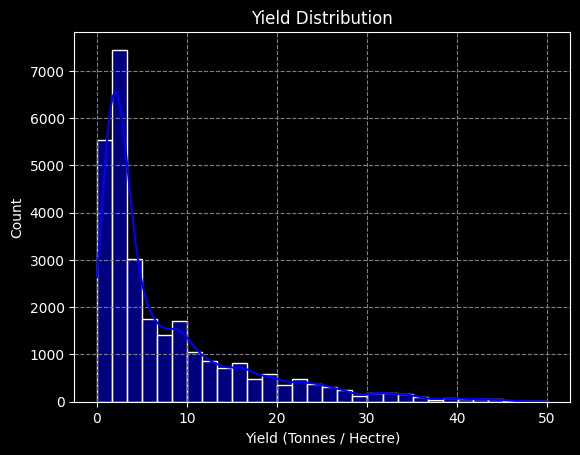

In [38]:
plt.style.use("dark_background")
sns.histplot(ag['Yield (Tonnes / Hectre)'], bins=30, color='blue', kde=True)
plt.title("Yield Distribution")
plt.grid(linestyle='--', color='gray')
plt.show()

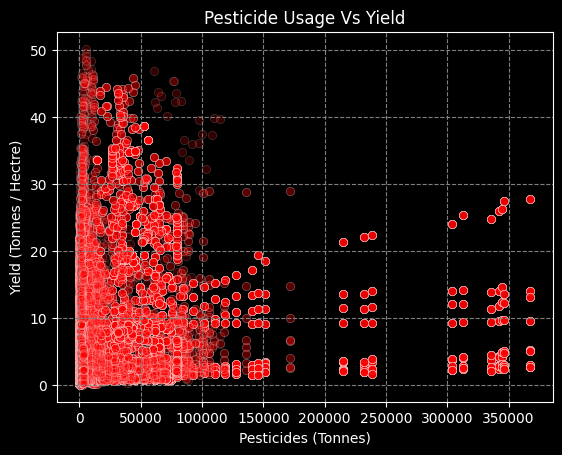

In [39]:
sns.scatterplot(x = 'Pesticides (Tonnes)', y = 'Yield (Tonnes / Hectre)', data = ag, color='red',alpha=0.2)
plt.title('Pesticide Usage Vs Yield')
plt.grid(linestyle='--', color='gray')
plt.show()


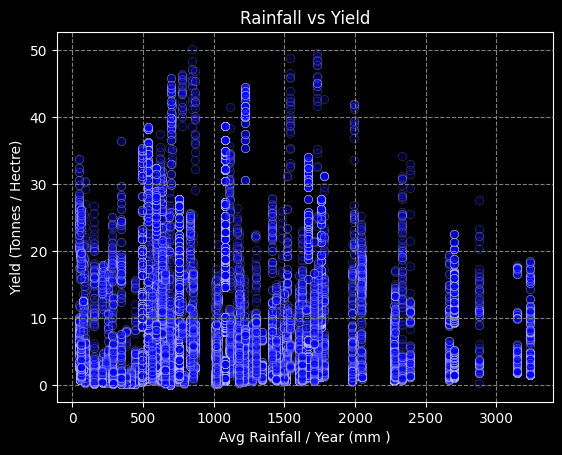

In [40]:
sns.scatterplot(x='Avg Rainfall / Year (mm )', y='Yield (Tonnes / Hectre)', data=ag,color='blue',alpha=0.2)
plt.title("Rainfall vs Yield")
plt.grid(linestyle='--',color='gray')

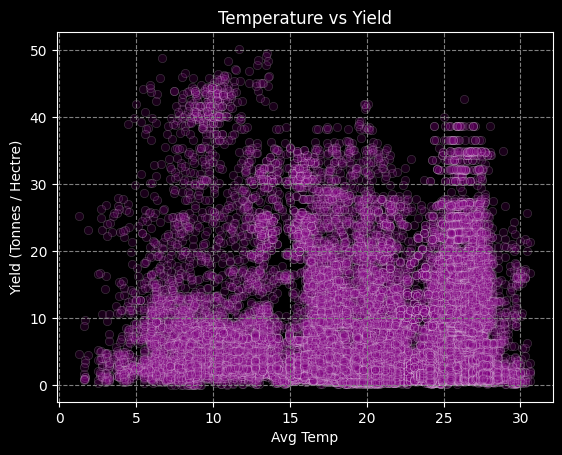

In [41]:
sns.scatterplot(x='Avg Temp', y='Yield (Tonnes / Hectre)', data=ag,color='purple',alpha=0.2)
plt.title("Temperature vs Yield")
plt.grid(linestyle='--',color='gray')

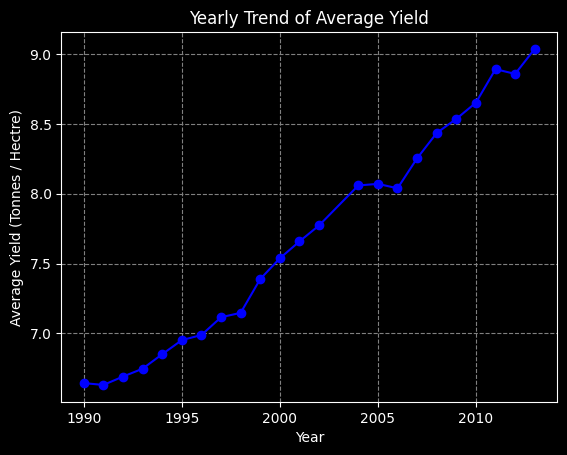

In [42]:
avg_yield = ag.groupby('Year')['Yield (Tonnes / Hectre)'].mean()
avg_yield.plot(marker = 'o', linestyle='-', color='blue')
plt.title("Yearly Trend of Average Yield")
plt.xlabel("Year")
plt.ylabel("Average Yield (Tonnes / Hectre)")
plt.grid(linestyle = '--', color='gray')
plt.show()

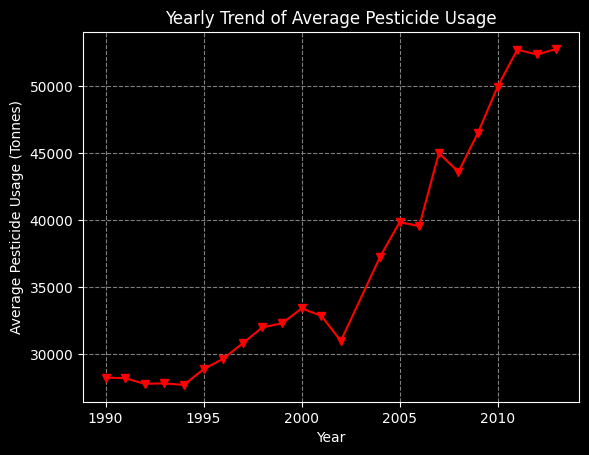

In [43]:
avg_pest = ag.groupby('Year')['Pesticides (Tonnes)'].mean()
avg_pest.plot(marker = 'v', linestyle='-', color='red')
plt.title("Yearly Trend of Average Pesticide Usage")
plt.xlabel("Year")
plt.ylabel("Average Pesticide Usage (Tonnes)")
plt.grid(linestyle = '--', color='gray')
plt.show()

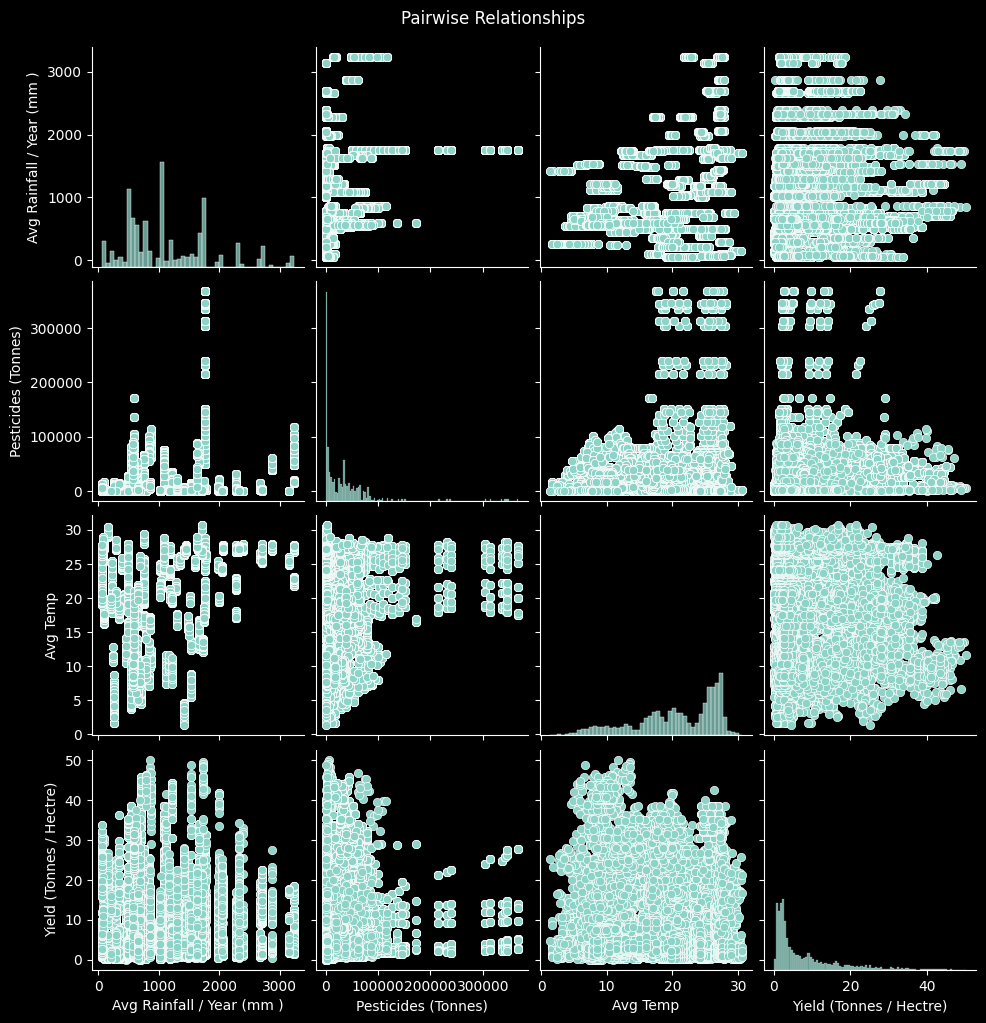

In [44]:
sns.pairplot(ag[['Avg Rainfall / Year (mm )', 'Pesticides (Tonnes)', 'Avg Temp', 'Yield (Tonnes / Hectre)']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


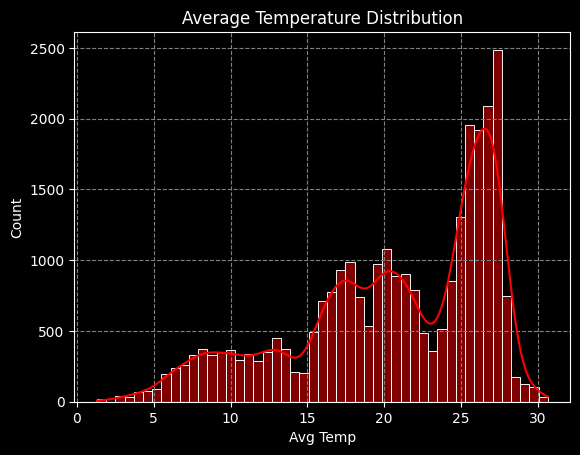

In [45]:
sns.histplot(ag['Avg Temp'], kde=True, color='red')
plt.grid(linestyle = '--', color='gray')
plt.title("Average Temperature Distribution")
plt.show()

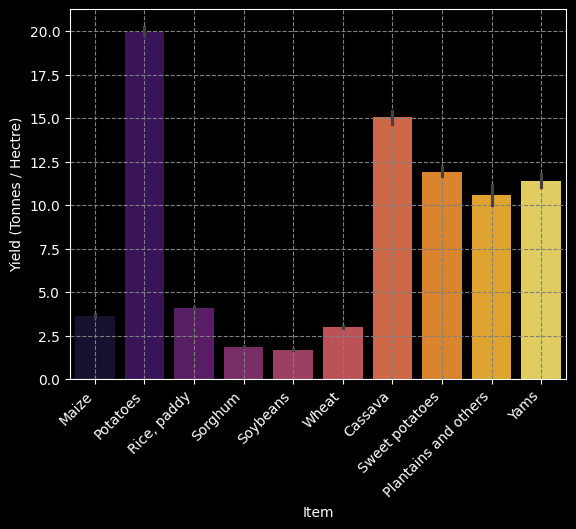

In [68]:
plt.figsize=(16,10)
sns.barplot(x='Item', y = 'Yield (Tonnes / Hectre)', hue='Item', palette='inferno',data=ag)
plt.grid(linestyle='--',color='gray')
plt.xticks(rotation=45, ha='right')
plt.show()

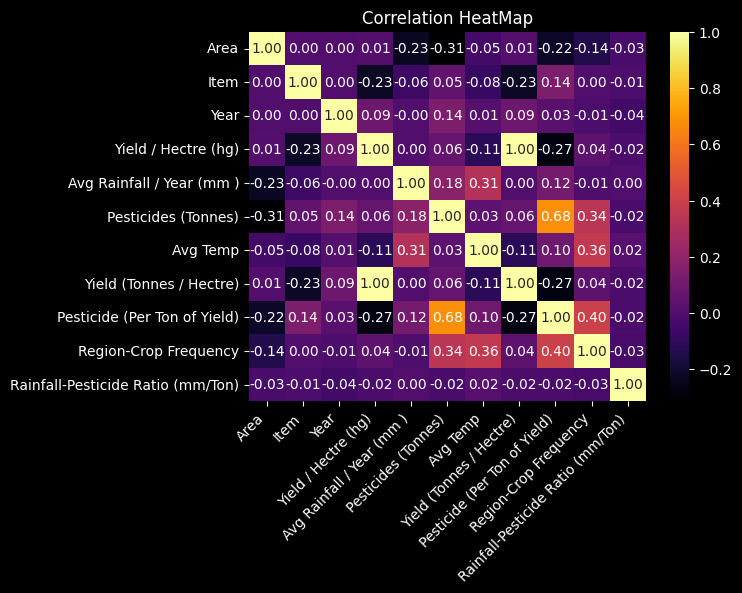

In [83]:
corr_matrix = ag.corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='inferno')
plt.title("Correlation HeatMap")
plt.xticks(rotation=45, ha='right')
plt.show()

# Outlier Detection & Removal



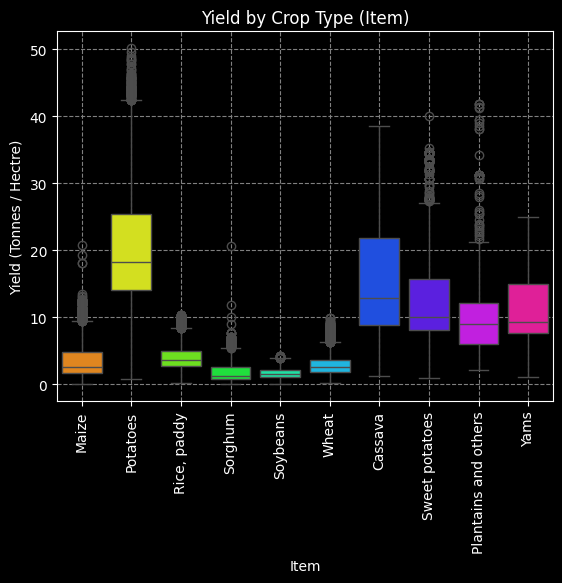

In [69]:
sns.boxplot(x='Item', y='Yield (Tonnes / Hectre)', data=ag,palette='hsv',hue='Item')
plt.title("Yield by Crop Type (Item)")
plt.xticks(rotation=90)
plt.grid(linestyle='--',color='gray')

In [70]:
Q1 = ag['Yield (Tonnes / Hectre)'].quantile(0.25)
Q3 = ag['Yield (Tonnes / Hectre)'].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

outliers = ag[(ag['Yield (Tonnes / Hectre)'] < lb) | (ag['Yield (Tonnes / Hectre)'] > ub)]

out_rem = ag[(ag['Yield (Tonnes / Hectre)'] >= lb) & (ag['Yield (Tonnes / Hectre)'] <= ub)]


In [71]:
print("Original Data Size:", ag.shape)
print("Outliers Detected:", outliers.shape[0])
print("Cleaned Data Size:", out_rem.shape)

Original Data Size: (28242, 11)
Outliers Detected: 2059
Cleaned Data Size: (26183, 11)


# Machine Learning Model Training (Regression)

1. Label Encoding

In [72]:
l_area = LabelEncoder()
l_item = LabelEncoder()

ag['Area'] = l_area.fit_transform(ag['Area'])
ag['Item'] = l_item.fit_transform(ag['Item'])

2. Features & Target Variables

In [75]:
x = ag[['Area','Item','Year','Avg Rainfall / Year (mm )', 
        'Pesticides (Tonnes)', 'Avg Temp']]
y = ag['Yield (Tonnes / Hectre)']

3. Splitting Date to Training Set & Test set

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

4. Implementing Random Forest Regressor Algorithm

In [77]:
ml = RandomForestRegressor()
ml.fit(x_train, y_train)

RandomForestRegressor()

5. Prediction With Test Set

In [78]:
y_pred = ml.predict(x_test)

df = {"Actual Yield (Test Set)" : y_test.values,
     "Predicted Yield": y_pred}

res = pd.DataFrame(df)
print(res.head())

   Actual Yield (Test Set)  Predicted Yield
0                   6.9220         7.156842
1                   2.0000         2.424457
2                   5.1206         5.134900
3                  16.6986        16.388773
4                   5.6319         5.855265


# Model Evaluation 

In [79]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R2 Score: 0.9861
RMSE: 1.0047
MAE: 0.3744
